In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd


LE = pd.read_excel('../DataSets/Life Expectancy.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 53, usecols = 'A:Y')
print(LE)

                                                 TIME  2012 Unnamed: 2  2013  \
0                                        GEO (Labels)   NaN        NaN   NaN   
1           European Union - 27 countries (from 2020)  80.2          b  80.5   
2           European Union - 28 countries (2013-2020)  80.3          b  80.5   
3           European Union - 27 countries (2007-2013)  80.3          b  80.6   
4                Euro area – 20 countries (from 2023)     :        NaN     :   
5               Euro area - 19 countries  (2015-2022)  81.3          b  81.6   
6                     Euro area - 18 countries (2014)  81.4          b  81.7   
7                                             Belgium  80.5        NaN  80.7   
8                                            Bulgaria  74.4        NaN  74.9   
9                                             Czechia  78.1        NaN  78.3   
10                                            Denmark  80.2        NaN  80.4   
11   Germany (until 1990 former territor

C:\Users\Diogo\AppData\Local\Temp\ipykernel_27872\3514502800.py:8: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  LE = pd.read_excel('../DataSets/Life Expectancy.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 53, usecols = 'A:Y')


In [4]:
LE = LE.dropna(axis=1, thresh=15) 


In [5]:
LE = LE.tail(-1)
LE

,TIME,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),80.2,80.5,80.8,80.5,80.9,80.9,81,81.3,80.4,80.1
2,European Union - 28 countries (2013-2020),80.3,80.5,80.9,80.6,81,80.9,81,:,:,:
3,European Union - 27 countries (2007-2013),80.3,80.6,80.9,80.6,81,81,81,:,:,:
4,Euro area – 20 countries (from 2023),:,:,:,:,:,:,:,:,:,81.6
5,Euro area - 19 countries (2015-2022),81.3,81.6,82,81.6,82,82,82.1,82.4,81.6,81.6
6,Euro area - 18 countries (2014),81.4,81.7,82.1,81.7,82.1,82,82.2,82.4,81.6,81.7
7,Belgium,80.5,80.7,81.4,81.1,81.5,81.6,81.7,82.1,80.8,81.9
8,Bulgaria,74.4,74.9,74.5,74.7,74.9,74.8,75,75.1,73.6,71.4
9,Czechia,78.1,78.3,78.9,78.7,79.1,79.1,79.1,79.3,78.3,77.2
10,Denmark,80.2,80.4,80.7,80.8,80.9,81.1,81,81.5,81.6,81.5


In [6]:
LE.replace(to_replace = ':', value = 0 , inplace = True)
LE

,TIME,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),80.2,80.5,80.8,80.5,80.9,80.9,81.0,81.3,80.4,80.1
2,European Union - 28 countries (2013-2020),80.3,80.5,80.9,80.6,81.0,80.9,81.0,0.0,0.0,0.0
3,European Union - 27 countries (2007-2013),80.3,80.6,80.9,80.6,81.0,81.0,81.0,0.0,0.0,0.0
4,Euro area – 20 countries (from 2023),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.6
5,Euro area - 19 countries (2015-2022),81.3,81.6,82.0,81.6,82.0,82.0,82.1,82.4,81.6,81.6
6,Euro area - 18 countries (2014),81.4,81.7,82.1,81.7,82.1,82.0,82.2,82.4,81.6,81.7
7,Belgium,80.5,80.7,81.4,81.1,81.5,81.6,81.7,82.1,80.8,81.9
8,Bulgaria,74.4,74.9,74.5,74.7,74.9,74.8,75.0,75.1,73.6,71.4
9,Czechia,78.1,78.3,78.9,78.7,79.1,79.1,79.1,79.3,78.3,77.2
10,Denmark,80.2,80.4,80.7,80.8,80.9,81.1,81.0,81.5,81.6,81.5


In [7]:
LE.rename(columns = {'TIME':'Countries'}, inplace = True)


In [8]:
LE = LE[ LE["Countries"].str.contains("European")==False ]
LE = LE[ LE["Countries"].str.contains("metropolitan")==False ]
LE = LE[ LE["Countries"].str.contains("Kosovo")==False ]
LE = LE[ LE["Countries"].str.contains("Belarus")==False ]
LE = LE[ LE["Countries"].str.contains("Russia")==False ]
LE = LE[ LE["Countries"].str.contains("San Marino")==False ]
LE = LE[ LE["Countries"].str.contains("Moldova")==False ]
LE = LE[ LE["Countries"].str.contains("Kingdom")==False ]
LE = LE[ LE["Countries"].str.contains("area")==False ]

In [9]:
B = LE.iloc[: , :-3].copy()
B = B.iloc[: , 1:].copy()
B[B == 0] = np.nan
H = B.mean().round(1)
Z = B.append(H, ignore_index=True)
mean = (sum(Z.iloc[-1])/9)
mean = round(mean,1)
mean

C:\Users\Diogo\AppData\Local\Temp\ipykernel_27872\1870001450.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Z = B.append(H, ignore_index=True)


61.8

In [10]:
Column1 = LE[["Countries"]]
Column1_ = Column1.append({'Countries': 'Mean from 2010 to 2018'}, ignore_index=True)
LE = LE[["2019"]]
LE = LE.append(pd.Series([mean], index=LE.columns), ignore_index=True)
LE_ = Column1_.join(LE)
LE_

C:\Users\Diogo\AppData\Local\Temp\ipykernel_27872\2084561817.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Column1_ = Column1.append({'Countries': 'Mean from 2010 to 2018'}, ignore_index=True)
C:\Users\Diogo\AppData\Local\Temp\ipykernel_27872\2084561817.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LE = LE.append(pd.Series([mean], index=LE.columns), ignore_index=True)


,Countries,2019
0,Belgium,82.1
1,Bulgaria,75.1
2,Czechia,79.3
3,Denmark,81.5
4,Germany (until 1990 former territory of the FRG),81.3
5,Germany including former GDR,81.3
6,Estonia,79.0
7,Ireland,82.8
8,Greece,81.7
9,Spain,84.0


In [11]:
LE_['Countries'].replace('Germany (until 1990 former territory of the FRG)','Germany',inplace=True)

In [12]:
LE_.dtypes

Countries     object
2019         float64
dtype: object

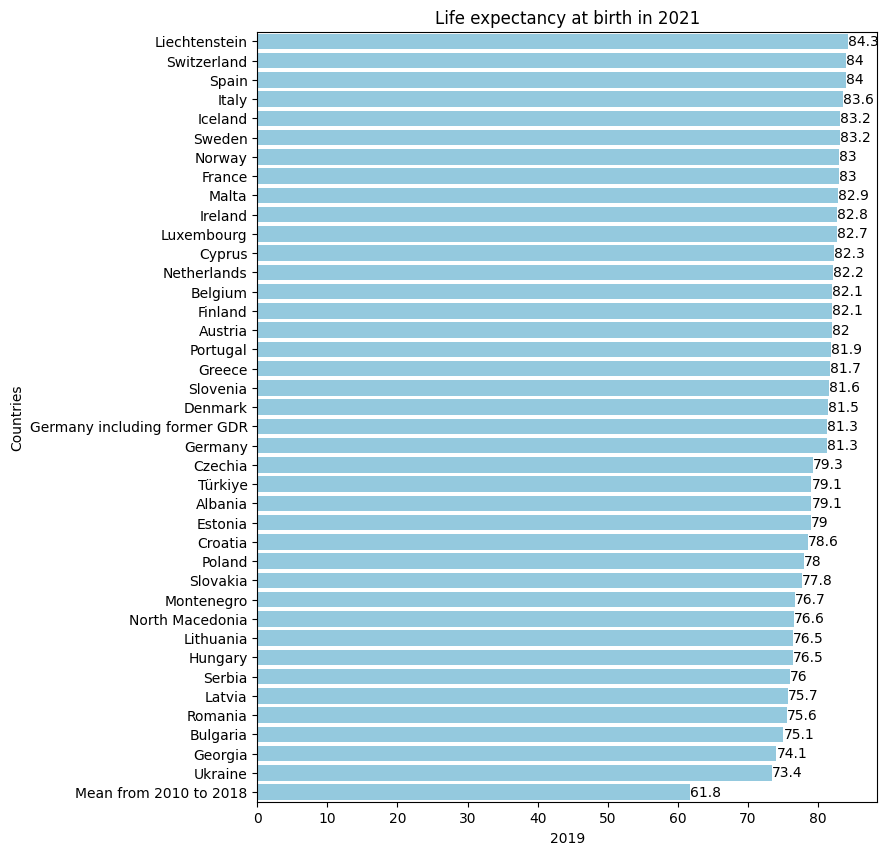

In [13]:
tmp = LE_.copy()    
tmp.sort_values(by="2019", ascending=False, inplace=True)

plt.figure(figsize = (8, 10))
ax = sns.barplot(data=tmp, x="2019", y="Countries", color="skyblue")
ax.bar_label(ax.containers[0])
plt.title(f"Life expectancy at birth in 2021")
plt.show()

C:\Users\Diogo\AppData\Local\Temp\ipykernel_27872\3675642211.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['Countries']):


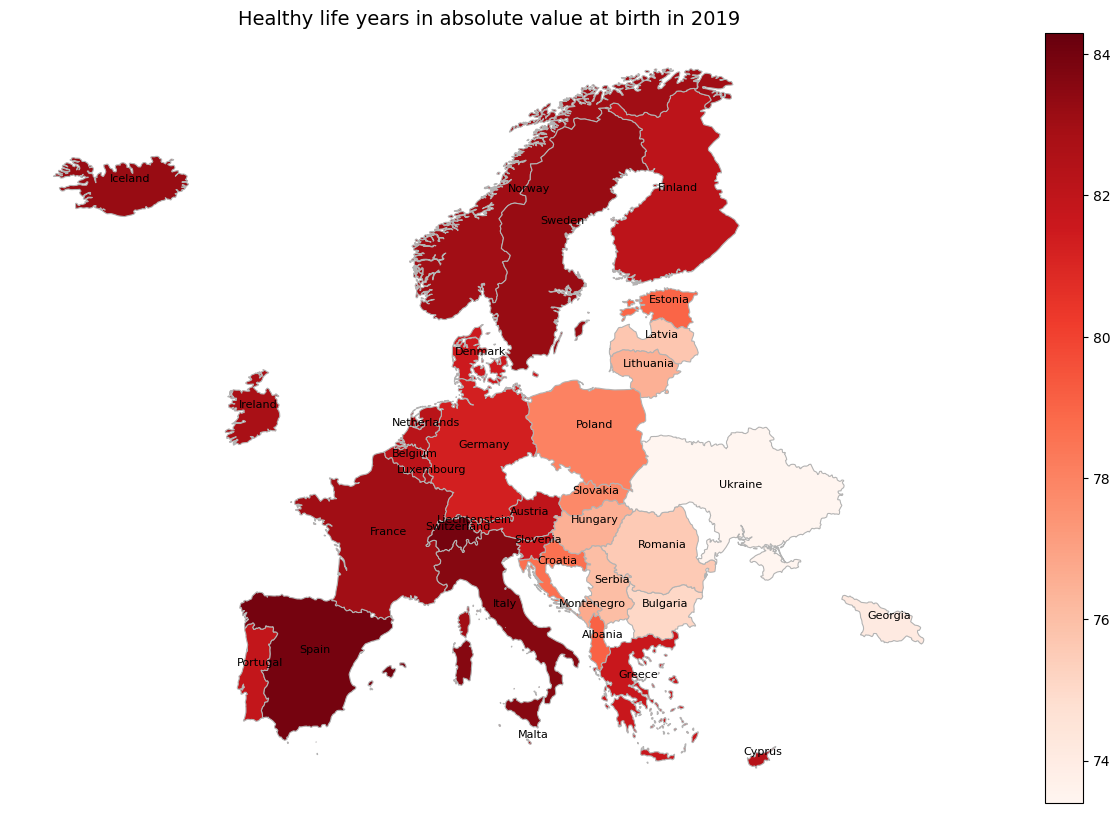

In [14]:
geo = pd.DataFrame()
geo= LE_
geo.columns

europe = gpd.read_file('../DataSets/europe.geojson')[['NAME', 'geometry']]

europe_countries= list(europe.NAME.values)
my_countries = list(geo.Countries.values)
countries_unformated = set(my_countries)-set(europe_countries)

europe_map = europe.merge(geo, left_on='NAME', right_on='Countries', how='left')

fig, ax = plt.subplots(1, figsize=(20, 10))
graph = europe_map.plot(column='2019', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.7', legend = True)
ax.axis('off')
for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['Countries']):
    if not pd.isnull(label):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center')
graph.set_title('Healthy life years in absolute value at birth in 2019', fontsize=14)
plt.show()